<a href="https://colab.research.google.com/github/CaioCesar999/DNC_Port/blob/main/Projeto_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

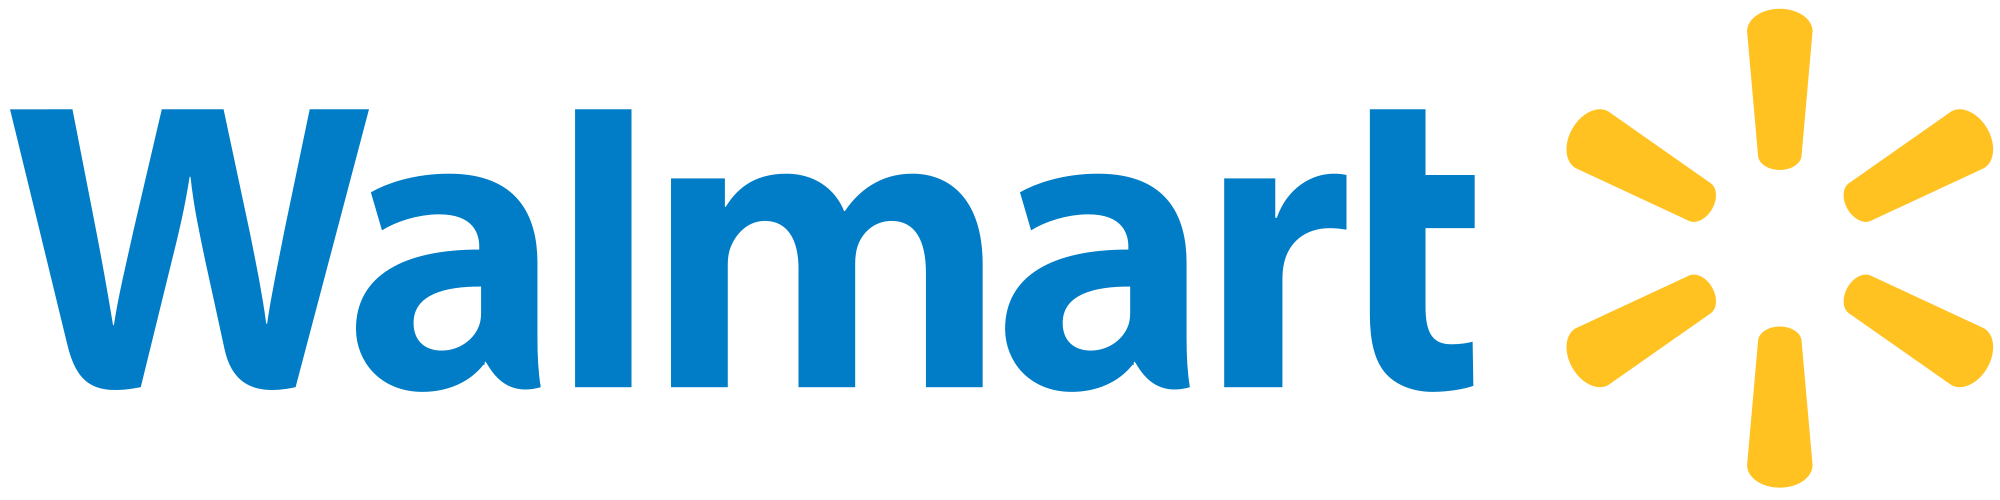

#Contextualização

###Você foi contratado pelo Wallmart para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. 

###É preciso analisar as vendas semanais de cada loja, calcular algumas informações importantes que serão perguntadas e ao final de tudo, indicar em qual loja deva ser investida.


###Walmart, Inc., é uma multinacional estadunidense de lojas de departamento. 
###A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. 

###No ano de 2021, obteve um um lucro de $13.51 Bilhões.Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. 

###O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.


#Proposta para Análise

###A empresa te contratou para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. 

###Você deve montar um colab bem redigido mostrando o passo a passo das etapas de análise do case, fazendo uma introdução e dados atuais sobre o problema.

###Também é importante ressaltar/explicar passagens complexas ou insights que você tiver durante a resolução desse projeto.


#Estruturando o problema:

#Qual é a questão do negócio?

- Escolher uma loja que tenha maior chance de se destacar entre as demais ao ser expandida

#Como chegar na solução?

- EDA e através de métricas criadas, definir qual loja tem melhor chance de ser expandida  

# Entendimento do negócio

###Quais dados eu tenho disponíveis?
- Dataset kagle. URL: https://www.kaggle.com/datasets/yasserh/walmart-dataset

###Eles serão relevantes para o problema?
- Inicialmente todos os dados parecem ser relevantes ou ter alguma correlação com problema.

###Eles me trazem uma solução direta?
- Podem me trazer, mas seria mais coerente calcular métricas auxiliares.

###Qual o meu setor ou range de negócio?
- Até agora não temos nada definido

#A coleta dos dados

###Os dados que eu tenho fazem sentido?
- Não faria sentido: Vendas semanais abaixo de zero, CPI negativo, Taxa desemprego negativo.

###Estão no formato que eu gostaria?
- A maioria dos dados sim, porém é valido algumas transformações(Mês/Ano).

###O que mais eu consigo obter de informação desses dados?
- Média movel, Média geral por loja, Ganho semanal (Venda(x) - Venda(x-1)), Ganho semana percentual ([Venda(x) - Venda(x-1)] / Venda(x-1)), semana do ano vendeu acima da média ou meta.

# Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, datetime

#Análise introdutória

In [ ]:
# Load csv
df = pd.read_csv('/content/drive/MyDrive/Walmart.csv')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4427,31,21-09-2012,1373064.87,0,71.54,3.721,222.416936,6.565
3840,27,08-06-2012,1764756.31,0,64.05,3.871,142.115810,8.253
359,3,01-07-2011,368962.72,0,85.10,3.524,218.546705,7.567
160,2,04-06-2010,2102539.93,0,81.81,2.705,210.833616,8.200
6160,44,23-04-2010,278287.04,0,55.66,2.936,126.471333,7.972


In [ ]:
df.Holiday_Flag.unique()

array([0, 1])

In [ ]:
#Achando valores nulos

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#Transformando data para formato datetime

df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

# Criando coluna ano e mes

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


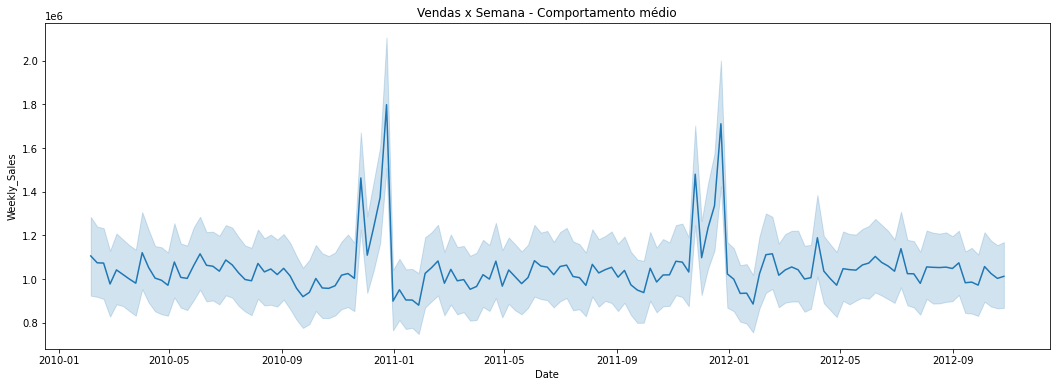

In [ ]:
# Analise grafica  - Venda por tempo

plt.figure(figsize=(18,6))
sns.lineplot(data = df, x='Date', y='Weekly_Sales')
plt.title('Vendas x Semana - Comportamento médio')
plt.show()

In [ ]:
# Métricas estatísticas

df.describe(percentiles=[0.8,0.9,0.95,0.99])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
80%,36.200000,1.539977e+06,0.000000,77.782000,3.795000,214.694328,8.876000
90%,41.000000,1.887626e+06,0.000000,83.992000,3.916000,219.534098,9.863000
95%,43.000000,2.049179e+06,1.000000,87.663000,4.029000,221.926729,12.187000
99%,45.000000,2.404035e+06,1.000000,93.190000,4.203000,225.470151,14.180000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


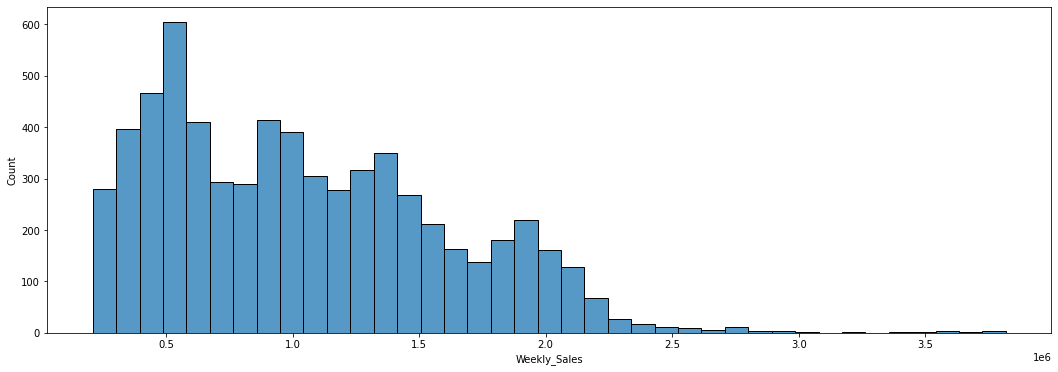

In [ ]:
# Distribuição de vendas semanais

# O normal de vendas das lojas do Walmart é entre 0.25 e 1.5 milhões

plt.figure(figsize=(18,6))
sns.histplot(data=df, x= 'Weekly_Sales', palette= 'Blues');

In [ ]:
# Lojas que tiveram maior distribuição de vendas

df.groupby(by = 'Store').sum().sort_values(by = 'Weekly_Sales', ascending = False).head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Store,,,,,,,,,
20,3.013978e+08,10,7929.55,488.718,29892.452680,1054.112,287568,922,3692
4,2.995440e+08,10,8902.23,460.027,18401.192733,852.951,287568,922,3692
14,2.889999e+08,10,8264.11,488.718,26638.851959,1236.771,287568,922,3692
13,2.865177e+08,10,7678.69,469.919,18401.192733,1001.261,287568,922,3692
2,2.753824e+08,10,9754.94,460.417,30837.422420,1090.210,287568,922,3692


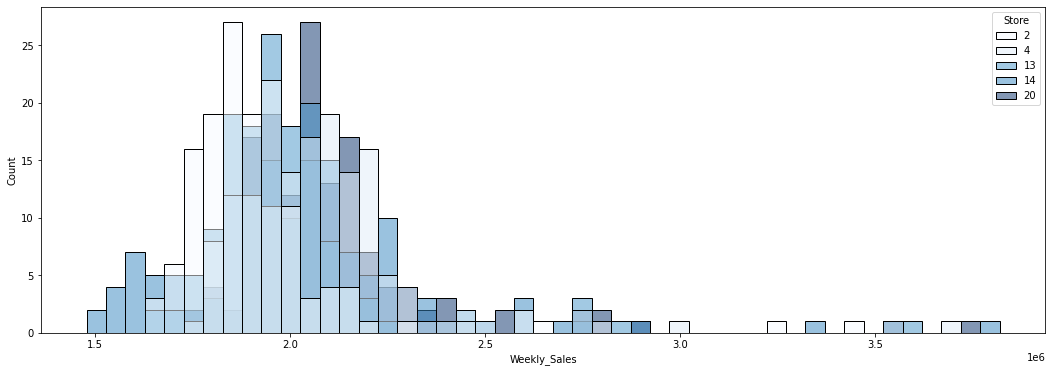

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=df[df.Store.isin([20,4,14,13,2])], x= 'Weekly_Sales', hue='Store', palette= 'Blues');

#Perguntas importantes

###1 - Qual a média de vendas semanais por loja?

In [ ]:
# Agrupando valores pela média das lojas e ordenando pela loja que mais vendeu

# Copy df
df_goup = df.copy

# Agrupar
df_group = df.groupby(by = 'Store').mean()

# Ordenar
df_group = df_group.sort_values(by = 'Weekly_Sales', ascending = False)

df_group

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Store,,,,,,,,,
20,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413,2010.965035,6.447552,25.818182
4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692,2010.965035,6.447552,25.818182
14,2.020978e+06,0.06993,57.790979,3.417608,186.285678,8.648748,2010.965035,6.447552,25.818182
13,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825,2010.965035,6.447552,25.818182
2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846,2010.965035,6.447552,25.818182
10,1.899425e+06,0.06993,72.241189,3.575923,128.679669,8.362965,2010.965035,6.447552,25.818182
27,1.775216e+06,0.06993,57.311119,3.578294,139.011284,8.001748,2010.965035,6.447552,25.818182
6,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902,2010.965035,6.447552,25.818182
1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420,2010.965035,6.447552,25.818182


In [ ]:
# Top 5 lojas que mais venderam

top_5 = df_group.index.to_list()[:5]
top_5 

[20, 4, 14, 13, 2]

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


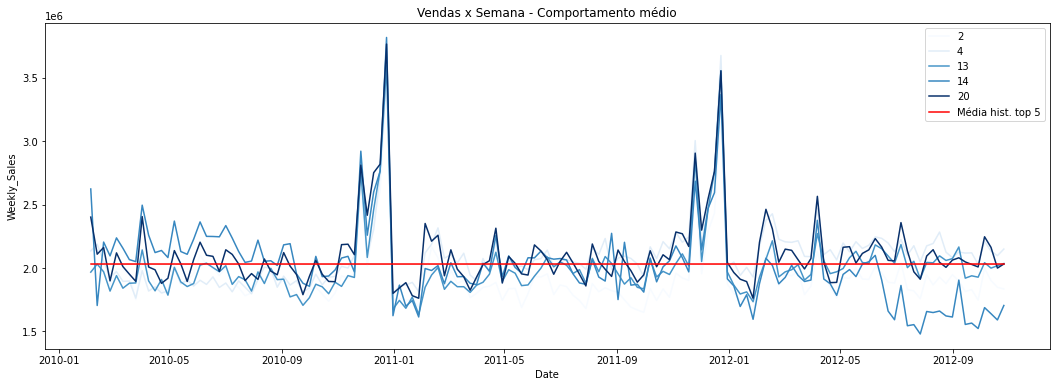

In [ ]:
# Analise grafica  - Venda por tempo

plt.figure(figsize=(18,6))
sns.lineplot(data = df[df.Store.isin(top_5)], x='Date', y='Weekly_Sales', hue= 'Store', palette = 'Blues')
sns.lineplot(data = df[df.Store.isin(top_5)], x='Date', y=df[df.Store.isin(top_5)]['Weekly_Sales'].mean(), c = 'Red',label = 'Média hist. top 5')
plt.title('Vendas x Semana - Comportamento médio')
plt.legend()
plt.show()

###2 - Qual o atributo tem maior correlação (positiva ou negativa) com o numero de vendas?

In [ ]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,3.474318e-12,2.910676e-15,3.106283e-15
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.837754e-02,7.614332e-02,7.421127e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-5.678257e-02,1.229958e-01,1.277427e-01
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,2.358618e-01,2.361833e-01
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.794703e-01,-4.215590e-02,-3.240300e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,7.479573e-02,4.979672e-03,6.041530e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.418135e-01,-1.274559e-02,-1.589158e-02
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000e+00,-1.944645e-01,-1.819189e-01
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,-1.944645e-01,1.000000e+00,9.959843e-01
Week,3.106283e-15,0.074211,1.277427e-01,0.236183,-0.032403,0.006042,-0.015892,-1.819189e-01,9.959843e-01,1.000000e+00


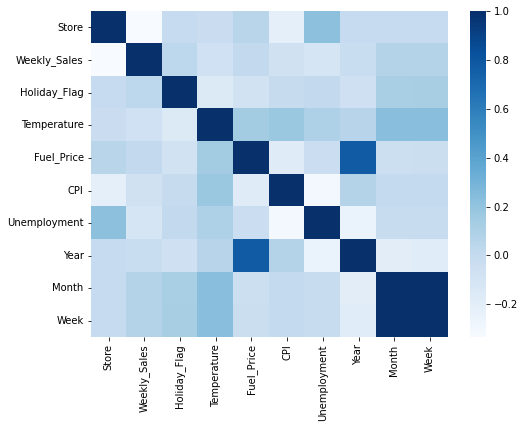

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap = 'Blues');

###3 - Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média  do período?

In [ ]:
# Df copy
df_acul = df.copy()


# Filtro loja 20
df_20 = df_acul[df_acul.Store == 20]

# Média da loja 20
mean_20 = df_acul[df_acul.Store == 20]['Weekly_Sales'].mean()





In [ ]:
mean_20

2107676.8703496507

In [ ]:
# Quantas semanas do periodo a loja 20 vendeu?
df_20.shape[0]

143

In [ ]:
# Quantas dessas semanas a loja 20 vendeu maior que a média de venda dela?
df_20[df_20.Weekly_Sales >= mean_20].shape[0]

52

In [ ]:
# Percentual do periodo que a loja 20 bateu a média
df_20[df_20.Weekly_Sales >= mean_20].shape[0]/ df_20.shape[0] * 100

36.36363636363637

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


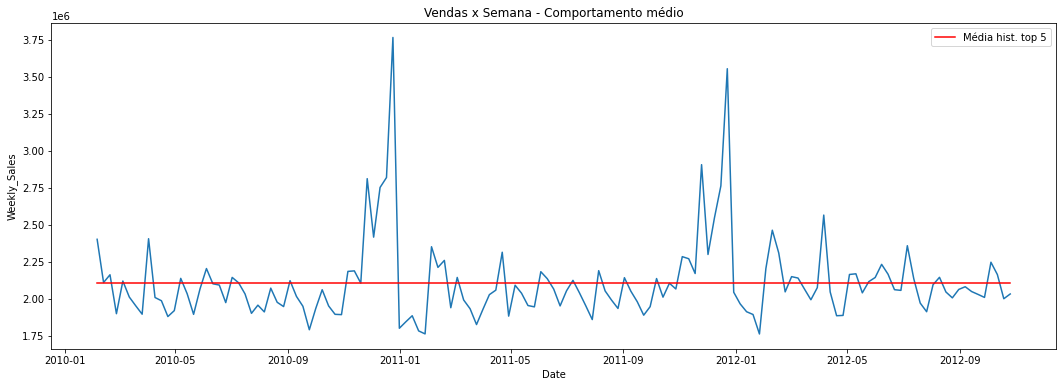

In [ ]:
# Analise grafica  - Venda por tempo

plt.figure(figsize=(18,6))
sns.lineplot(data = df[df.Store == 20], x='Date', y='Weekly_Sales', palette = 'Blues')
sns.lineplot(data = df[df.Store == 20], x='Date', y=df[df.Store == 20]['Weekly_Sales'].mean(), c = 'Red',label = 'Média hist. top 5')
plt.title('Vendas x Semana - Comportamento médio')
plt.legend()
plt.show()

###4 - Fazer um grafico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressaltar de alguma forma o período de feridos mencionados acima

In [ ]:
# Dicionario de feriados

holyday_dict = {# Format %d/%m/%y
                'Super Bowl' : ['12/02/10', '11/02/11', '10/02/12'],
                'Labour Day' : ['10/09/10', '09/09/11', '07/09/12'],
                'Thanksgiving' : ['26/11/10', '25/11/11', '23/11/12'],
                'Christmas' : ['31/12/10', '30/12/11', '28/12/12']    
}

In [ ]:
holyday_dict

{'Christmas': ['31/12/10', '30/12/11', '28/12/12'],
 'Labour Day': ['10/09/10', '09/09/11', '07/09/12'],
 'Super Bowl': ['12/02/10', '11/02/11', '10/02/12'],
 'Thanksgiving': ['26/11/10', '25/11/11', '23/11/12']}

In [ ]:
# Demonstrando como acessar valores no dict

for i in holyday_dict.keys():
  print(i)
  for j in holyday_dict[i]:
    print(j)

Super Bowl
12/02/10
11/02/11
10/02/12
Labour Day
10/09/10
09/09/11
07/09/12
Thanksgiving
26/11/10
25/11/11
23/11/12
Christmas
31/12/10
30/12/11
28/12/12


In [ ]:
# Pegando o nome do feriado

for i in holyday_dict.keys():
  #print(i)
  for j in holyday_dict[i]:
   #print(j)
   print(f'{i} - {j[-2:]}')

Super Bowl - 10
Super Bowl - 11
Super Bowl - 12
Labour Day - 10
Labour Day - 11
Labour Day - 12
Thanksgiving - 10
Thanksgiving - 11
Thanksgiving - 12
Christmas - 10
Christmas - 11
Christmas - 12


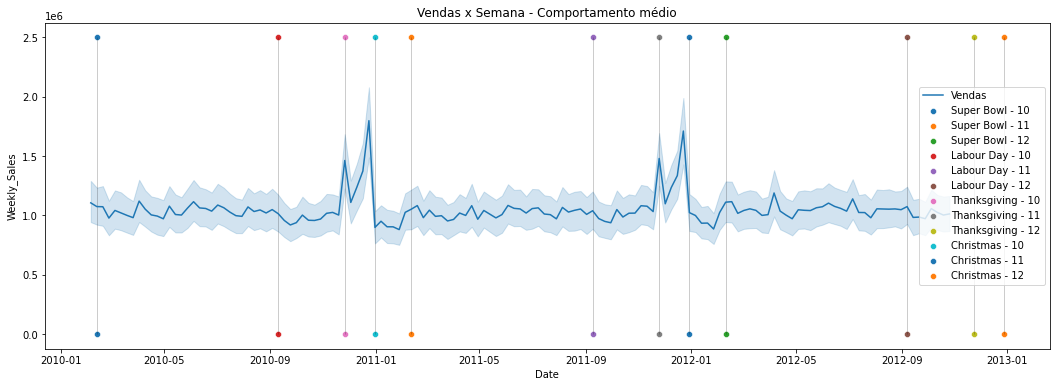

In [ ]:
# Analise grafica  - Venda por tempo

plt.figure(figsize=(18,6))
sns.lineplot(data = df, x='Date', y='Weekly_Sales', label = 'Vendas')

for i in holyday_dict.keys():
  #print(i)
  for j in holyday_dict[i]:
   #print(j)

   #Format date holiday - 07/09/12 = %d/%m/%y
   date_target = datetime.strptime(j,'%d/%m/%y')

   sns.scatterplot(x =[date_target, date_target], 
                       y = [0, 2.5*10**6], label = f'{i} - {j[-2:]}')

   sns.lineplot(x =[date_target, date_target], 
                    y = [0, 2.5*10**6], linestyle = '--', color = 'black')



plt.title('Vendas x Semana - Comportamento médio')
plt.show()

###5 - Pensando na expansão de uma das lojas, que loja você escolheria e por que?

Como fator de escolha para a pergunta acima, vou escolher a loja que teve um maior rendimento histórico. Ou seja, vou escolher aquela que teve mais semanas com vendas acima da média histórica.

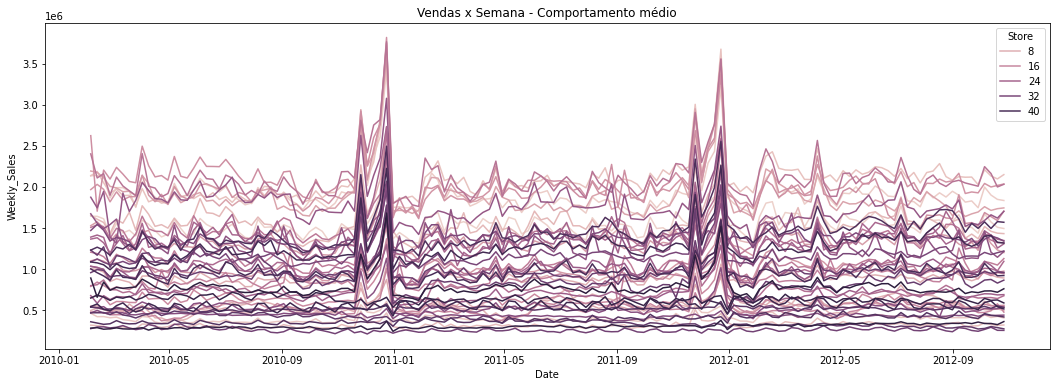

In [ ]:
# Analise grafica  - Venda por tempo

plt.figure(figsize=(18,6))
sns.lineplot(data = df, x='Date', y='Weekly_Sales', hue = 'Store')
plt.title('Vendas x Semana - Comportamento médio')
plt.show()

In [ ]:
# DF copy
df_mean = df.copy()

# Agrupamento
df_mean = df_mean.groupby('Store', as_index = False).mean()

# Seleção
df_mean = df_mean[['Store', 'Weekly_Sales']]

df_mean


,Store,Weekly_Sales
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05
5,6,1.564728e+06
6,7,5.706173e+05
7,8,9.087495e+05
8,9,5.439806e+05
9,10,1.899425e+06


In [ ]:
lista_aux = []
lista_aux_bat = []

for i in df_mean.Store:
  total = df[df.Store == i].shape[0]
  lista_aux.append(total)
  bateu = df[(df.Store == i) & (df.Weekly_Sales >= df_mean.iloc[i-1,1]) ].shape[0]
  lista_aux_bat.append(bateu)

In [ ]:
df_mean['Total'] = lista_aux
df_mean['Bateu'] = lista_aux_bat
df_mean['Percentual'] = df_mean['Bateu']/df_mean['Total'] *100

df_mean.sort_values(by = 'Percentual', ascending = False, inplace = True)

df_mean

,Store,Weekly_Sales,Total,Bateu,Percentual
42,43,6.333247e+05,143,73,51.048951
41,42,5.564039e+05,143,71,49.650350
35,36,3.735120e+05,143,71,49.650350
36,37,5.189003e+05,143,69,48.251748
37,38,3.857317e+05,143,68,47.552448
29,30,4.385796e+05,143,68,47.552448
32,33,2.598617e+05,143,67,46.853147
25,26,1.002912e+06,143,67,46.853147
13,14,2.020978e+06,143,66,46.153846
43,44,3.027489e+05,143,66,46.153846


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


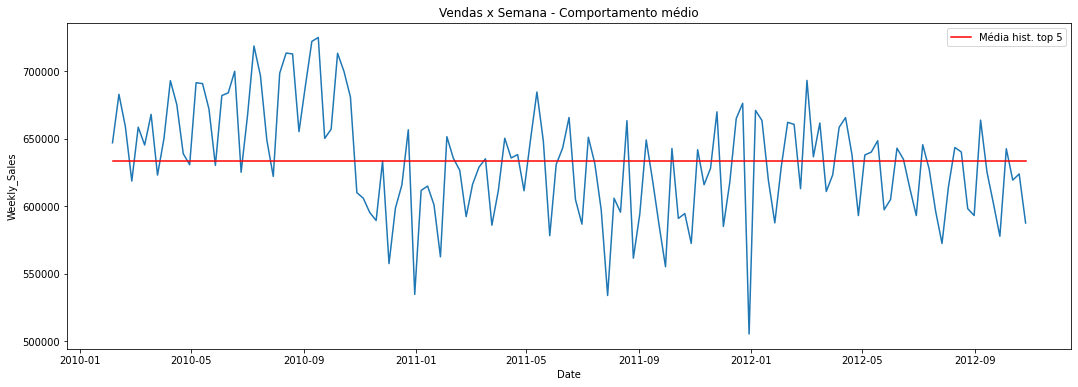

In [ ]:
# Analise grafica  - Venda por tempo

plt.figure(figsize=(18,6))
sns.lineplot(data = df[df.Store == 43], x='Date', y='Weekly_Sales', palette = 'Blues')
sns.lineplot(data = df[df.Store == 43], x='Date', y=df[df.Store == 43]['Weekly_Sales'].mean(), c = 'Red',label = 'Média hist. top 5')
plt.title('Vendas x Semana - Comportamento médio')
plt.legend()
plt.show()

###Analisando os dados > 2010

In [ ]:
# DF copy
df_mean = df.copy()

# Agrupamento
df_mean = df_mean[((df.Year > 2010))].groupby('Store', as_index = False).mean()

# Seleção
df_mean = df_mean[['Store', 'Weekly_Sales']]

df_mean

,Store,Weekly_Sales
0,1,1.569726e+06
1,2,1.895838e+06
2,3,4.088560e+05
3,4,2.145931e+06
4,5,3.225227e+05
5,6,1.545724e+06
6,7,5.897915e+05
7,8,9.131232e+05
8,9,5.543158e+05
9,10,1.864690e+06


In [ ]:
lista_aux = []
lista_aux_bat = []

for i in df_mean.Store:
  total = df[(df.Store == i) & (df.Year > 2010) ].shape[0]
  lista_aux.append(total)
  bateu = df[(df.Store == i) & (df.Year > 2010) & (df.Weekly_Sales >= df_mean.iloc[i-1,1]) ].shape[0]
  lista_aux_bat.append(bateu)

In [ ]:
df_mean['Total'] = lista_aux
df_mean['Bateu'] = lista_aux_bat
df_mean['Percentual'] = df_mean['Bateu']/df_mean['Total'] *100

df_mean.sort_values(by = 'Percentual', ascending = False, inplace = True)

df_mean

,Store,Weekly_Sales,Total,Bateu,Percentual
29,30,4.313452e+05,95,51,53.684211
41,42,5.691333e+05,95,50,52.631579
42,43,6.213519e+05,95,49,51.578947
17,18,1.043540e+06,95,49,51.578947
37,38,4.060193e+05,95,47,49.473684
36,37,5.230976e+05,95,45,47.368421
39,40,9.632942e+05,95,45,47.368421
25,26,1.000270e+06,95,44,46.315789
13,14,1.931975e+06,95,44,46.315789
32,33,2.567725e+05,95,44,46.315789


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


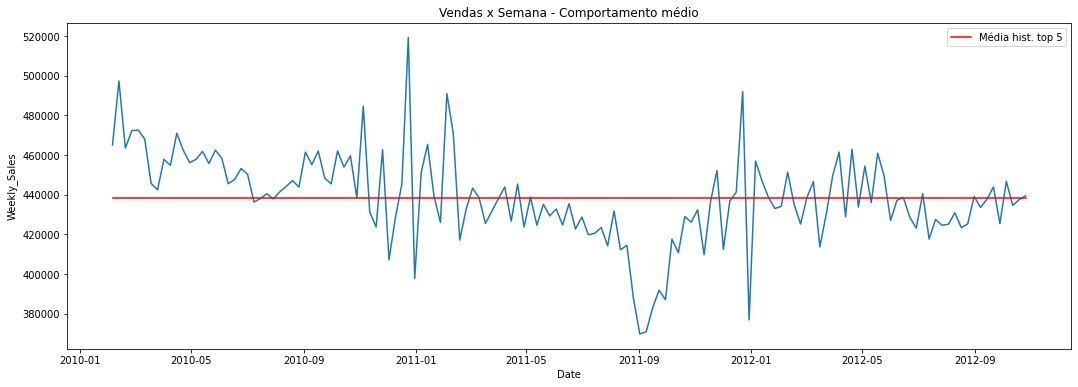

In [ ]:
# Analise grafica  - Venda por tempo

plt.figure(figsize=(18,6))
sns.lineplot(data = df[df.Store == 30], x='Date', y='Weekly_Sales', palette = 'Blues')
sns.lineplot(data = df[df.Store == 30], x='Date', y=df[df.Store == 30]['Weekly_Sales'].mean(), c = 'Red',label = 'Média hist. top 5')
plt.title('Vendas x Semana - Comportamento médio')
plt.legend()
plt.show()